In [704]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [705]:
df = pd.read_excel('/content/drive/MyDrive/final data.xlsx')

# Explolatory Data Analysis

In [706]:
df.head()

,commodity,category,pricetype,unit,usdprice,price,YearMonth,Element Code,Element Type,Currency,...,"Inflation, GDP deflator (annual %)",GDP (current US$),GDP (current LCU),GDP growth (annual %),GDP per capita (current US$),"GNI per capita, PPP (current international $)","GNI per capita, PPP (constant 2017 international $)",rainfall long term average [mm] (rfh_avg),"Consumer Prices, Food Indices (2015 = 100)",Food price inflation
0,Cassava,cereals and tubers,Wholesale,91 KG,14.752133,13.403333,2006-1,LCU,Local currency units per USD,GHC,...,83.621034,2.062301e+10,1.982506e+10,6.319619,892.825828,2992,3119.235364,8.887086,46.302363,0.1141
1,Maize,cereals and tubers,Wholesale,100 KG,24.562483,22.316667,2006-1,LCU,Local currency units per USD,GHC,...,88.500277,2.182636e+10,2.078195e+10,6.688366,944.921742,3167,3301.241096,9.405643,49.004082,0.1150
2,Millet,cereals and tubers,Wholesale,93 KG,37.604260,34.166000,2006-1,LCU,Local currency units per USD,GHC,...,86.648077,2.136956e+10,1.933245e+10,6.548387,925.145713,3100,3232.150253,9.208795,47.978488,0.1143
3,Rice (local),cereals and tubers,Wholesale,50 KG,28.467917,25.865000,2006-1,LCU,Local currency units per USD,GHC,...,85.518946,2.109109e+10,1.873975e+10,6.463053,913.089927,3060,3190.031363,9.088793,47.353269,0.1177
4,Sorghum,cereals and tubers,Wholesale,109 KG,36.289717,32.971667,2006-1,LCU,Local currency units per USD,GHC,...,81.770518,2.016663e+10,1.846214e+10,6.179768,873.067781,2926,3050.207347,8.690417,45.277702,0.1176


In [707]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3573 entries, 0 to 3572
Data columns (total 32 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   commodity                                                      3573 non-null   object 
 1   category                                                       3573 non-null   object 
 2   pricetype                                                      3573 non-null   object 
 3   unit                                                           3573 non-null   object 
 4   usdprice                                                       3573 non-null   float64
 5   price                                                          3573 non-null   float64
 6   YearMonth                                                      3573 non-null   object 
 7   Element Code                                                

In [708]:
# checking columns that seem to have the same value throughout
df['Element Type'].value_counts(), df['Element Code'].value_counts()

(Element Type
 Local currency units per USD    3573
 Name: count, dtype: int64,
 Element Code
 LCU    3573
 Name: count, dtype: int64)

In [709]:
df['commodity'].value_counts()

,count
commodity,
Yam,285
Rice (local),260
Cassava,259
Maize,259
Millet,252
Sorghum,252
Rice (imported),249
Plantains (apentu),230
Yam (puna),104


In [710]:
# removing columns Year and Month, they  both exist in YearMonth column
df.drop(['Year', 'Month'], axis=1, inplace=True)

# removing Element Code and Element Type as they have zero variance
df.drop(['Element Code', 'Element Type'], axis=1, inplace=True)

In [711]:
# comparing columns that seem to be the same
df['Currency'].value_counts(), df['Currency2'].value_counts()

(Currency
 GHS    3501
 GHC      72
 Name: count, dtype: int64,
 Currency2
 Ghana Cedi    3501
 Cedi            72
 Name: count, dtype: int64)

In the context, GHC and GHS are standing for the same thing, to change them all to one label:

In [712]:
# Currency and Currency2 are redundant, dropping on of them
df.drop(['Currency2'], axis=1, inplace=True)
df['Currency'] = df['Currency'].replace('GHC', 'GHS')
df['Currency'].value_counts()

,count
Currency,
GHS,3573


# Feature Engineering

All goods have different measures in different units, which could cause inconsistency in dealing with how each unit relate to price. Creating a new feature 'price_per_unit' would cater for this inconsistency.

In [713]:
df['unit'].value_counts()

,count
unit,
KG,1046
50 KG,409
109 KG,302
100 KG,263
Bunch,232
91 KG,211
93 KG,204
250 KG,150
100 Tubers,143


In [714]:
# to make the units column an integers only column
removals = ['KG', 'pcs', 'Bunch', 'Tubers']
new_unit = []

for i in df['unit']:
    for j in removals:
        if j in i:
            i = i.replace(j, '').strip()          # replacing strings with an empty string and stripping them off i
    new_unit.append(i)

In [715]:
# to convert the elements in new_unit to integers:
for i in range(len(new_unit)):
    if new_unit[i] == '':
        new_unit[i] = 1                           # replacing empty strings with one since they represent 1 unit
    else:
        new_unit[i] = int(new_unit[i])

In [716]:
# putting new column and removing 'usdprice' and 'unit'
df['price_per_unit'] = df['usdprice']/new_unit
df.drop(['usdprice', 'unit'], axis=1, inplace=True)

<Axes: >

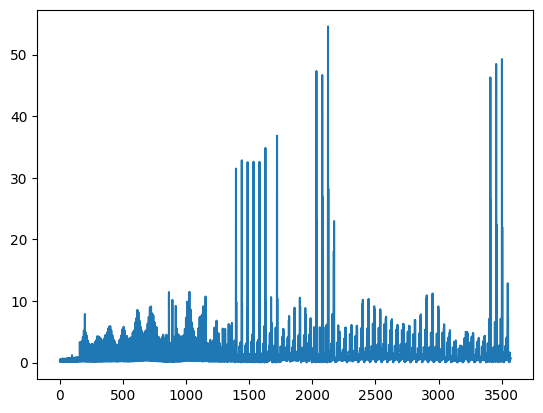

In [717]:
# plotting price_per_unit to visualize the distribution
ppu = df['price_per_unit']
ppu.plot()

In [718]:
# to convert YearMonth to a datetime object since it's a time series
df['YearMonth'] = pd.to_datetime(df['YearMonth'])

In [719]:
# keeping yearmonth during encodeing and scaling
year_month_column = df['YearMonth']
df = df.drop('YearMonth', axis=1)

In [720]:
df['YearMonth'] = year_month_column
reference_date = pd.Timestamp('2006-01-01')
df['days_since_reference'] = (df['YearMonth'] - reference_date).dt.days
df.drop('YearMonth', axis=1, inplace=True)

# Encoding

In [721]:
# using label encoder to encode non-numerical columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [722]:
# extracting categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])
df.drop(categorical_columns, axis = 1, inplace = True)
df.head()

,price,Exchange rate ($),PPI average value,"Foreign direct investment, net inflows (% of GDP)",Urban population,Total Polulation,Agricultural land (sq. km),Current account balance (% of GDP),"Agriculture, forestry, and fishing, value added (current US$)","Agriculture, forestry, and fishing, value added (current LCU)",...,"GNI per capita, PPP (constant 2017 international $)",rainfall long term average [mm] (rfh_avg),"Consumer Prices, Food Indices (2015 = 100)",Food price inflation,price_per_unit,days_since_reference,commodity_encoded,category_encoded,pricetype_encoded,Currency_encoded
0,13.403333,0.916452,658470.027697,3.007084,10945482,22808791,118926.910249,-5.056608,5.843138e+09,5.347097e+09,...,3119.235364,8.887086,46.302363,0.1141,0.162111,0,0,0,1,0
1,22.316667,0.916452,696891.405167,3.182546,11584145,24139672,125866.232493,-5.056608,6.184082e+09,5.659097e+09,...,3301.241096,9.405643,49.004082,0.1150,0.245625,0,7,0,1,0
2,34.166000,0.916452,682306.340667,3.115939,11341704,23634459,123232.009850,-5.056608,6.054657e+09,5.540659e+09,...,3232.150253,9.208795,47.978488,0.1143,0.404347,0,11,0,1,0
3,25.865000,0.916452,673415.050398,3.075335,11193907,23326473,121626.145292,-5.056608,5.975758e+09,5.468458e+09,...,3190.031363,9.088793,47.353269,0.1177,0.569358,0,18,0,1,0
4,32.971667,0.916452,643898.225648,2.940538,10703261,22304038,116295.082950,-5.056608,5.713831e+09,5.228767e+09,...,3050.207347,8.690417,45.277702,0.1176,0.332933,0,20,0,1,0


In [723]:
# saving the label encoder as pickle
import pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [724]:
# downloading the encoder for use in deployment
from google.colab import files
# files.download('label_encoder.pkl')

In [725]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [726]:
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)

# Feature Selection

In [727]:
# target variable, (Y)
ppu = df['price_per_unit']

In [728]:
# putting back yearmonth column
# df['YearMonth'] = year_month_column
# using multilevel index because index is supposed to identify each row uniquely
# df.set_index(['YearMonth', 'commodity_encoded', 'price'], inplace=True)

In [729]:
# reference_date = pd.Timestamp('2006-01-01')
# df['days_since_reference'] = (df['YearMonth'] - reference_date).dt.days
# df.drop('YearMonth', axis=1, inplace=True)

In [730]:
df.head()

,price,Exchange rate ($),PPI average value,"Foreign direct investment, net inflows (% of GDP)",Urban population,Total Polulation,Agricultural land (sq. km),Current account balance (% of GDP),"Agriculture, forestry, and fishing, value added (current US$)","Agriculture, forestry, and fishing, value added (current LCU)",...,"GNI per capita, PPP (constant 2017 international $)",rainfall long term average [mm] (rfh_avg),"Consumer Prices, Food Indices (2015 = 100)",Food price inflation,price_per_unit,days_since_reference,commodity_encoded,category_encoded,pricetype_encoded,Currency_encoded
0,-0.641341,-1.521861,4.486173,-0.574201,-2.380740,-2.436291,-1.471137,-0.243371,-2.609617,-1.655735,...,-2.517282,-0.942311,-1.516597,-0.354040,-0.383093,-2.55287,-1.833313,-0.732212,0.643374,0.0
1,-0.600247,-1.521861,4.760974,-0.495985,-2.139593,-2.025763,0.267227,-0.243371,-2.476940,-1.647653,...,-2.254323,-0.924968,-1.478643,-0.348412,-0.355847,-2.55287,-0.887676,-0.732212,0.643374,0.0
2,-0.545618,-1.521861,4.656657,-0.525677,-2.231134,-2.181603,-0.392670,-0.243371,-2.527306,-1.650721,...,-2.354145,-0.931551,-1.493051,-0.352789,-0.304065,-2.55287,-0.347312,-0.732212,0.643374,0.0
3,-0.583888,-1.521861,4.593064,-0.543777,-2.286939,-2.276605,-0.794954,-0.243371,-2.558009,-1.652591,...,-2.414997,-0.935565,-1.501834,-0.331526,-0.250230,-2.55287,0.598325,-0.732212,0.643374,0.0
4,-0.551124,-1.521861,4.381952,-0.603866,-2.472198,-2.591989,-2.130434,-0.243371,-2.659937,-1.658800,...,-2.617013,-0.948888,-1.530991,-0.332152,-0.327363,-2.55287,0.868507,-0.732212,0.643374,0.0


In [731]:
prediction_steps = 4

In [732]:
df.columns.get_loc('commodity_encoded'), df.columns.get_loc('price'), df.columns.get_loc('price_per_unit'), df.columns.get_loc('days_since_reference')

(22, 0, 20, 21)

In [733]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

def df_to_X_y(df, window_size=5, prediction_steps=prediction_steps):
    df_as_np = df.to_numpy()
    X = []
    y = []

    for i in range(len(df) - window_size - prediction_steps + 1):

        # Prepare the features: price, commodity, date
        price_window = df_as_np[i:i + window_size, 0]
        commodity = df_as_np[i:i + window_size, 22]
        dates = df_as_np[i:i + window_size, 21]

        # Combine features (ppu with commodity and dates)
        row = np.column_stack((price_window, commodity, dates))
        X.append(row)

        # Labels (future prices for prediction_steps)
        label = df_as_np[i + window_size:i + window_size + prediction_steps, 0]  # only ppu values in y
        y.append(label)

    return np.array(X), np.array(y)

In [734]:
# def df_to_X_y(df, window_size=5, prediction_steps=prediction_steps):
#     df_as_np = df.to_numpy()
#     X = []
#     y = []
#     for i in range(len(df_as_np) - window_size - prediction_steps + 1):
#         row = [[a] for a in df_as_np[i:i + window_size]]
#         X.append(row)
#         label = df_as_np[i + window_size:i + window_size + prediction_steps]
#         y.append(label)
#     return np.array(X), np.array(y)

In [735]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(df, WINDOW_SIZE)
X1.shape, y1.shape

((3565, 5, 3), (3565, 4))

In [736]:
# splitting into train, validation, and test data
X_train1, y_train1 = X1[:3000], y1[:3000]
X_val1, y_val1 = X1[3000:3250], y1[3000:3250]
X_test1, y_test1 = X1[3250:], y1[3250:]

In [737]:
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((3000, 5, 3), (3000, 4), (250, 5, 3), (250, 4), (315, 5, 3), (315, 4))

## Model Training

**Training three models:**

**1. First one is an LSTM model where we used gridsearch to find the best parameters**

**2. Second one is a Bidirectional LSTM**

**3. Third one is an CNN with one convolutional layer**

End goal is to compare these models to find the best one which will be deployed.

In [738]:
# pip install --upgrade tensorflow

In [739]:
# pip install scikeras

In [740]:
# !pip install --upgrade scikit-learn

In [741]:
# !pip install scikit-learn==1.0.2

In [742]:
# keeping trained models in a list:
models = []

In [743]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Bidirectional
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

# Model 1 - LSTM with GridSearch

In [744]:
def build_lstm_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train1.shape[1], X_train1.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(y_train1.shape[1]))  # Output units must match the number of targets
    model.compile(optimizer='adam', loss='mse')
    return model


In [745]:
# function to create model
def build_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train1.shape[1], X_train1.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(prediction_steps))

    checkpoint_grid = ModelCheckpoint('model1/model.keras', save_best_only=True)
    model.compile(optimizer='adam', loss='mse')
    return model

In [746]:
# wrapping the model using KerasRegressor
model1 = KerasRegressor(model=build_lstm_model, epochs=10, batch_size=16, verbose=0)

In [747]:
param_grid = {
    'model__units': [50, 100],
    'model__dropout_rate': [0.2, 0.3],
    'batch_size': [16, 32],
    'epochs': [10, 20]
}

In [748]:
# training model from a grid of hyperparameters GridSearchCV
grid = GridSearchCV(estimator=model1, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train1, y_train1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a l

In [795]:
# determinng the best parameters and the corresponding score
print(f"Best params: {grid_result.best_params_}")
print(f"Best score: {grid_result.best_score_}")

Best params: {'batch_size': 16, 'epochs': 20, 'model__dropout_rate': 0.2, 'model__units': 100}
Best score: -0.4610466575304608


In [750]:
# creating the model with the best parameters
model1 = build_model(units=100, dropout_rate=0.2)
model1.compile(optimizer='adam', loss='mse')

# training the model on the entire training set
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=20, batch_size=16)

# adding model1 to the list of models
models.append(model1)

Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.5313 - val_loss: 1.8304
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4658 - val_loss: 1.5256
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4090 - val_loss: 1.2827
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3936 - val_loss: 1.1115
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3593 - val_loss: 0.9575
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3245 - val_loss: 0.8517
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3122 - val_loss: 0.7672
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3008 - val_loss: 0.7273
Epoch 9/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2930 - val_loss: 0.6651
Epoch 10/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2680 - val_loss: 0.6230
Epoch 11/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2554 - val_loss: 0.6652
Epoch 12/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [751]:
# evaluating the model on the test data
test_loss = model1.evaluate(X_test1, y_test1)
print(f"Test Loss: {test_loss}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5109 
Test Loss: 2.613992214202881


In [752]:
test_predictions = model1.predict(X_test1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [753]:
test_results = pd.DataFrame(data={'Test Predictions':test_predictions.flatten(), 'Actuals':y_test1.flatten()})
test_results

,Test Predictions,Actuals
0,0.955034,1.265874
1,-0.844030,-0.674741
2,0.781002,1.776568
3,-0.626237,-0.673286
4,-0.384932,-0.674741
...,...,...
1255,0.521744,7.847985
1256,0.003562,7.847985
1257,1.467607,7.847985
1258,-0.883110,7.847985


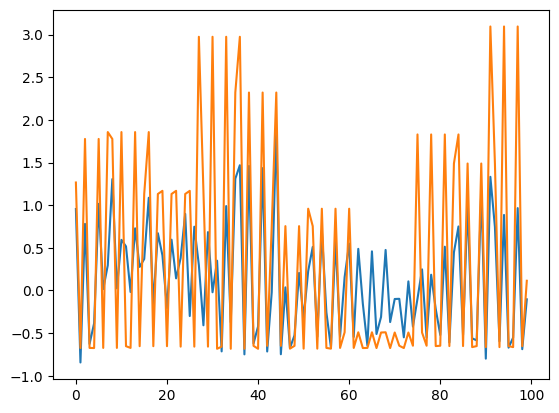

In [754]:
import matplotlib.pyplot as plt

plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])
plt.show()

In [755]:
val_loss = model1.evaluate(X_val1, y_val1)
print(f"Test Loss: {val_loss}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4257 
Test Loss: 0.4833317697048187


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


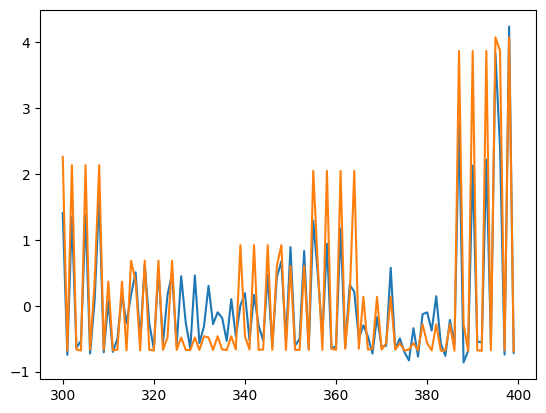

In [756]:
val_predictions = model1.predict(X_val1)
val_results = pd.DataFrame(data={'Val Predictions':val_predictions.flatten(), 'Actuals':y_val1.flatten()})
plt.plot(val_results['Val Predictions'][300:400])
plt.plot(val_results['Actuals'][300:400])


# Model 2 - Bidirectional LSTM

In [757]:
model2 = Sequential()
model2.add(InputLayer((5, 3)))
model2.add(Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.001))))
model2.add(Dropout(0.2))
model2.add(Bidirectional(LSTM(64, kernel_regularizer=l2(0.001))))
model2.add(Dropout(0.2))
model2.add(Dense(8, 'relu'))
model2.add(Dense(prediction_steps, 'linear'))

# model2.compile(loss='mse', optimizer='adam', metrics=['mae'])
model2.summary()

Model: "sequential_468"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_24 (Bidirectional)     │ (None, 5, 128)              │          34,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_473 (Dropout)                │ (None, 5, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_25 (Bidirectional)     │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_474 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_487 (Dense)                    │ (None, 8)                   │           1,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_488 (Dense)                    │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,700 (526.17 KB)

 Trainable params: 134,700 (526.17 KB)

 Non-trainable params: 0 (0.00 B)

In [758]:
checkpoint = ModelCheckpoint('model2/model.keras', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer='adam', metrics=[RootMeanSquaredError()])

In [759]:
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((3000, 5, 3), (3000, 4), (250, 5, 3), (250, 4), (315, 5, 3), (315, 4))

In [760]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[checkpoint], batch_size=16)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - loss: 0.7889 - root_mean_squared_error: 0.7718 - val_loss: 1.9636 - val_root_mean_squared_error: 1.3884
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.5438 - root_mean_squared_error: 0.7167 - val_loss: 1.8080 - val_root_mean_squared_error: 1.3376
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5023 - root_mean_squared_error: 0.6964 - val_loss: 1.8535 - val_root_mean_squared_error: 1.3562
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.4957 - root_mean_squared_error: 0.6936 - val_loss: 1.7334 - val_root_mean_squared_error: 1.3117
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.4922 - root_mean_squared_error: 0.6921 - val_loss: 1.6185 - val_root_mean_squared_error: 1.2670
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.4753 - root_mean_squared_error: 0.6798 - val_loss: 1.5651 - val_root_mean_squared_error: 1.2452
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 26

In [761]:
from tensorflow.keras.models import load_model
model2 = load_model('model2/model.keras')
models.append(model2)

In [762]:
from google.colab import files
# files.download('model/model.keras')

In [763]:
def flatten_predictions(predictions):
    # flattening predictions for multi-step predictions
    return predictions.reshape(-1)

# predicting on the training set
train_predictions = model2.predict(X_train1)

# Flatten the predictions and actual values
flattened_predictions = flatten_predictions(train_predictions)
flattened_actuals = flatten_predictions(y_train1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


In [764]:
print(train_predictions.shape), print(y_train1.shape)

(3000, 4)
(3000, 4)


(None, None)

In [765]:
flattened_predictions.shape, flattened_actuals.shape

((12000,), (12000,))

In [766]:
train_results = pd.DataFrame({
    'Train Predictions': flattened_predictions,
    'Actuals': flattened_actuals
})

In [767]:
# train_predictions = model.predict(X_train1)
# train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
# train_results

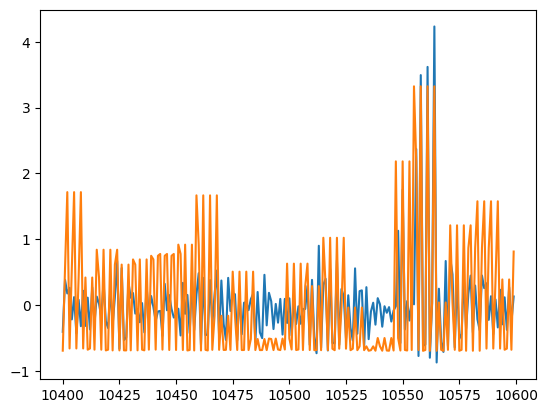

In [768]:
# visualizing model performance on training data
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][10400:10600])
plt.plot(train_results['Actuals'][10400:10600])

In [769]:
# testing the model's performance on validation data
val_predictions = model2.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1.flatten()})
val_results

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


,Val Predictions,Actuals
0,-0.590625,-0.650966
1,0.626661,-0.049407
2,-0.420228,-0.666032
3,0.234006,-0.574091
4,0.387362,-0.049407
...,...,...
995,-0.538626,-0.674741
996,-0.524081,-0.662810
997,0.386558,1.265874
998,-0.030951,-0.674741


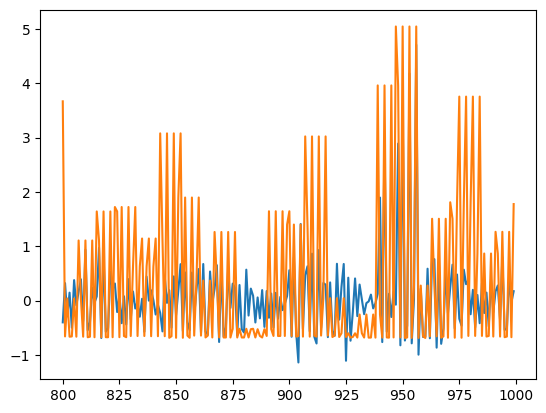

In [770]:
# model performance on validation data
plt.plot(val_results['Val Predictions'][800:])
plt.plot(val_results['Actuals'][800:])

In [771]:
# model's performance on new data - testing data
test_predictions = model2.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1.flatten()})
test_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


,Test Predictions,Actuals
0,0.986917,1.265874
1,-0.701070,-0.674741
2,1.053410,1.776568
3,-0.621955,-0.673286
4,-0.520246,-0.674741
...,...,...
1255,-0.669445,7.847985
1256,2.585156,7.847985
1257,-1.270201,7.847985
1258,0.891540,7.847985


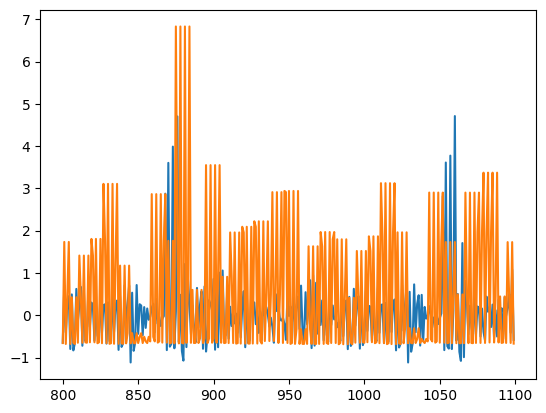

In [772]:
plt.plot(test_results['Test Predictions'][800:1100])
plt.plot(test_results['Actuals'][800:1100])

# Model 3 - CNN

In [773]:
from tensorflow.keras.layers import Conv1D, Flatten

In [774]:
# training another model
model3 = Sequential()
model3.add(InputLayer((5, 3)))
model3.add(Conv1D(64, kernel_size=2, activation='relu'))
model3.add(Flatten())
model3.add(Dense(8, 'relu'))
model3.add(Dense(prediction_steps, 'linear'))
model3.summary()

Model: "sequential_469"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)                    │ (None, 4, 64)               │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_489 (Dense)                    │ (None, 8)                   │           2,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_490 (Dense)                    │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,540 (9.92 KB)

 Trainable params: 2,540 (9.92 KB)

 Non-trainable params: 0 (0.00 B)

In [775]:
checkpoint2 = ModelCheckpoint('model3/model.keras', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [776]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, callbacks=[checkpoint2])

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6020 - root_mean_squared_error: 0.7754 - val_loss: 2.0167 - val_root_mean_squared_error: 1.4201
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5774 - root_mean_squared_error: 0.7594 - val_loss: 1.9748 - val_root_mean_squared_error: 1.4053
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5529 - root_mean_squared_error: 0.7433 - val_loss: 1.9394 - val_root_mean_squared_error: 1.3926
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5680 - root_mean_squared_error: 0.7529 - val_loss: 1.9100 - val_root_mean_squared_error: 1.3820
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4969 - root_mean_squared_error: 0.7048 - val_loss: 1.8827 - val_root_mean_squared_error: 1.3721
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4734 - root_mean_squared_error: 0.6874 - val_loss: 1.8586 - val_root_mean_squared_error: 1.3633
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss:

In [777]:
model3 = load_model('model3/model.keras')
models.append(model3)

In [778]:
test_predictions1 = model3.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions1, 'Actuals':y_test1.flatten()})
test_results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


,Test Predictions,Actuals
0,1.246454,1.265874
1,-0.715092,-0.674741
2,1.077090,1.776568
3,-0.701681,-0.673286
4,-0.745763,-0.674741
...,...,...
1255,0.671321,7.847985
1256,0.148407,7.847985
1257,0.696953,7.847985
1258,0.662622,7.847985


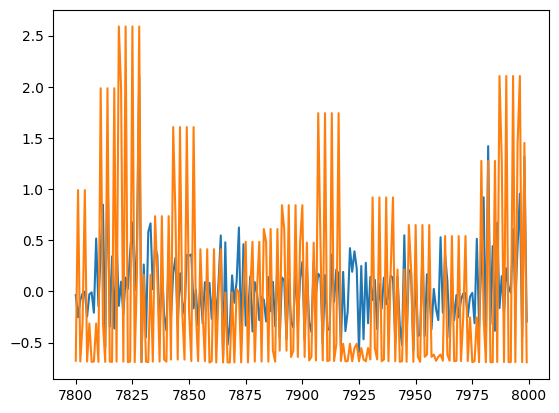

In [779]:
plt.plot(train_results['Train Predictions'][7800:8000])
plt.plot(train_results['Actuals'][7800:8000])

In [780]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [781]:
def evaluate_model(model, X_test, y_test):
    # getting model predictions
    predictions = model.predict(X_test)

    # catering for many predictions by flattening predictions numpy array
    if predictions.ndim > 1:
        predictions_flat = predictions.reshape(-1)
    else:
        predictions_flat = predictions.flatten()

    y_test_flat = y_test.reshape(-1)

    # checking if the sapes are compatible
    if len(y_test_flat) != len(predictions_flat):
        raise ValueError("Mismatch in number of samples between predictions and actual values.")

    # metrics to be used for comparison of models
    mse = mean_squared_error(y_test_flat, predictions_flat)
    mae = mean_absolute_error(y_test_flat, predictions_flat)
    loss_function = model.evaluate(X_test, y_test, verbose=0)

    return mse, mae, loss_function


In [782]:
results = []

# evaluating models and comparing the results from a dataframe to find the best performing
for i, model in enumerate(models):
  if model == model1:
    # loss_function = model1.evaluate(X_test1, y_test1)
    mse, mae, loss_function = evaluate_model(model1, X_test1, y_test1)
    results.append({
        'Model': f'Model_{i+1}',
        'MSE': mse,
        'MAE': mae,
        'Loss Function': loss_function
    })
  else:
    mse, mae, loss_function = evaluate_model(model, X_test1, y_test1)
    results.append({
        'Model': f'Model_{i+1}',
        'MSE': mse,
        'MAE': mae,
        'Loss Function': min(loss_function)
    })


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [783]:
results_df = pd.DataFrame(results)
results_df

,Model,MSE,MAE,Loss Function
0,Model_1,2.613992,0.955408,2.613992
1,Model_2,3.088326,1.082883,1.757363
2,Model_3,2.987976,1.067509,1.728576


In [784]:
# picking the best based on metrics
# best_model_index = results_df['Loss Function'].idxmin()
results_df['average'] = (results_df['MSE'] + results_df['MAE'] + results_df['Loss Function'])/3

best_model_index = results_df['average'].idxmin()
best_model_index

2

In [785]:
results_df

,Model,MSE,MAE,Loss Function,average
0,Model_1,2.613992,0.955408,2.613992,2.061131
1,Model_2,3.088326,1.082883,1.757363,1.976191
2,Model_3,2.987976,1.067509,1.728576,1.928020


In [786]:
# saving model at index 1
model2.save('model2/model.keras')

In [787]:
ls model2/

model.keras


In [788]:
from google.colab import files
files.download('model2/model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [789]:
# pickling and downloading used scaler
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [790]:
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [791]:
# downloading used encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [792]:
files.download('label_encoder.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [793]:
unscaled_features = scaler.inverse_transform(df[df.columns])

In [794]:
unscaled_df = pd.DataFrame(unscaled_features, columns=df.columns)
unscaled_df.head()

,price,Exchange rate ($),PPI average value,"Foreign direct investment, net inflows (% of GDP)",Urban population,Total Polulation,Agricultural land (sq. km),Current account balance (% of GDP),"Agriculture, forestry, and fishing, value added (current US$)","Agriculture, forestry, and fishing, value added (current LCU)",...,"GNI per capita, PPP (constant 2017 international $)",rainfall long term average [mm] (rfh_avg),"Consumer Prices, Food Indices (2015 = 100)",Food price inflation,price_per_unit,days_since_reference,commodity_encoded,category_encoded,pricetype_encoded,Currency_encoded
0,13.403333,0.916452,658470.027697,3.007084,10945482.0,22808791.0,118926.910249,-5.056608,5.843138e+09,5.347097e+09,...,3119.235364,8.887086,46.302363,0.1141,0.162111,0.0,0.0,0.0,1.0,0.0
1,22.316667,0.916452,696891.405167,3.182546,11584145.0,24139672.0,125866.232493,-5.056608,6.184082e+09,5.659097e+09,...,3301.241096,9.405643,49.004082,0.1150,0.245625,0.0,7.0,0.0,1.0,0.0
2,34.166000,0.916452,682306.340667,3.115939,11341704.0,23634459.0,123232.009850,-5.056608,6.054657e+09,5.540659e+09,...,3232.150253,9.208795,47.978488,0.1143,0.404347,0.0,11.0,0.0,1.0,0.0
3,25.865000,0.916452,673415.050398,3.075335,11193907.0,23326473.0,121626.145292,-5.056608,5.975758e+09,5.468458e+09,...,3190.031363,9.088793,47.353269,0.1177,0.569358,0.0,18.0,0.0,1.0,0.0
4,32.971667,0.916452,643898.225648,2.940538,10703261.0,22304038.0,116295.082950,-5.056608,5.713831e+09,5.228767e+09,...,3050.207347,8.690417,45.277702,0.1176,0.332933,0.0,20.0,0.0,1.0,0.0
